<a href="https://colab.research.google.com/github/ebinjomonkottakal/DeepLearningProjects/blob/main/CNN_CATS_AND_DOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten

In [ ]:
#generator
train_ds = tf.keras.utils.image_dataset_from_directory(
      directory = '/content/train',
      labels = 'inferred',
      label_mode = 'int',
      batch_size = 32,
      image_size = (256,256)
    )

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/225,tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
#CREATE CNN MODEL
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 10,validation_data = val_ds)

Epoch 1/10
625/625 [==============================] - 71s 90ms/step - loss: 0.6432 - accuracy: 0.6280 - val_loss: 0.5558 - val_accuracy: 0.7200
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.5228 - accuracy: 0.7390 - val_loss: 0.5551 - val_accuracy: 0.7084
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4322 - accuracy: 0.7988 - val_loss: 0.4847 - val_accuracy: 0.7662
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3319 - accuracy: 0.8519 - val_loss: 0.5175 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2127 - accuracy: 0.9135 - val_loss: 0.5986 - val_accuracy: 0.7954
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1250 - accuracy: 0.9520 - val_loss: 0.7272 - val_accuracy: 0.7802
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0803 - accuracy: 0.9721 - val_loss: 0.8738 - val_accuracy:

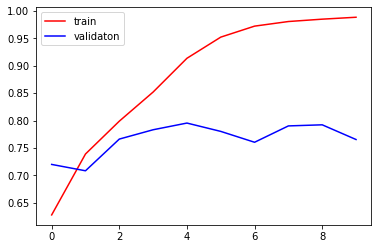

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validaton')
plt.legend()
plt.show()

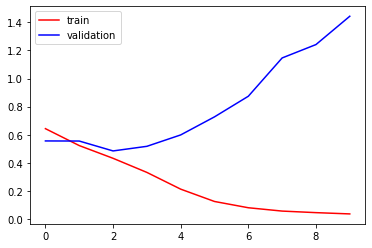

In [ ]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropouts
# Batch Norm
# Reduce Complexity


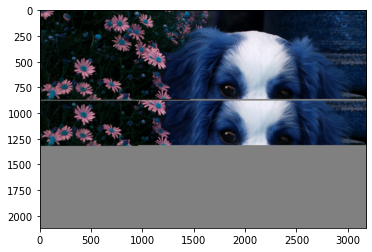

In [ ]:
import cv2
test_img = cv2.imread('/content/Cute_dog.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(2117, 3176, 3)

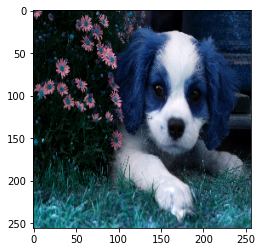

In [ ]:
test_input = cv2.resize(test_img,(256,256))
plt.imshow(test_input)
test_input = test_input.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 239ms/step


array([[1.]], dtype=float32)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
K